In [1]:
# import the package for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the datset from the github
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")
columns = df.columns[:9]

# Remove the predetermine train-test flag
df = df.drop("flag", axis = 1)
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,0


In [3]:
# Inspection of the dataset to see if there is any missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   y                   48842 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 3.7+ MB


In [4]:
# Numerical data quality report
num_data_quality = df.describe()
num_data_quality

,y
count,48842.000000
mean,0.239282
std,0.426649
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
# Categorical data quality report
category_column = df.select_dtypes("object")
category_data_quality = category_column.describe().T
category_data_quality

,count,unique,top,freq
hours_per_week_bin,48842,5,b. 31-40,26639
occupation_bin,48842,5,c. Mid - Mid,13971
msr_bin,48842,3,c. High,22047
capital_gl_bin,48842,3,a. = 0,42525
race_sex_bin,48842,3,c. High,29737
education_num_bin,48842,5,b. 9-12,30324
education_bin,48842,5,b. Mid,30324
workclass_bin,48842,2,b. income,46012
age_bin,48842,5,e. 40-55,13963


In [6]:
# Add the second most common word in the df
second_most_common_values = {}
freq = {}

for column in category_column.columns:
    value_counts = df[column].value_counts()
    second_most_common_values[column] = value_counts.index[1]
    freq[column] = value_counts.iloc[1]

category_data_quality['Second'] = [second_most_common_values.get(col) for col in category_data_quality.index]
category_data_quality['Second freq'] = [freq.get(col) for col in category_data_quality.index]


category_data_quality

,count,unique,top,freq,Second,Second freq
hours_per_week_bin,48842,5,b. 31-40,26639,d. 41-50 & 61-70,9819
occupation_bin,48842,5,c. Mid - Mid,13971,b. Mid - Low,12947
msr_bin,48842,3,c. High,22047,b. Mid,15868
capital_gl_bin,48842,3,a. = 0,42525,c. > 0,4035
race_sex_bin,48842,3,c. High,29737,b. Mid,16457
education_num_bin,48842,5,b. 9-12,30324,c. 13,8025
education_bin,48842,5,b. Mid,30324,c. Bachelors,8025
workclass_bin,48842,2,b. income,46012,a. no income,2830
age_bin,48842,5,e. 40-55,13963,a. 0-25,9627


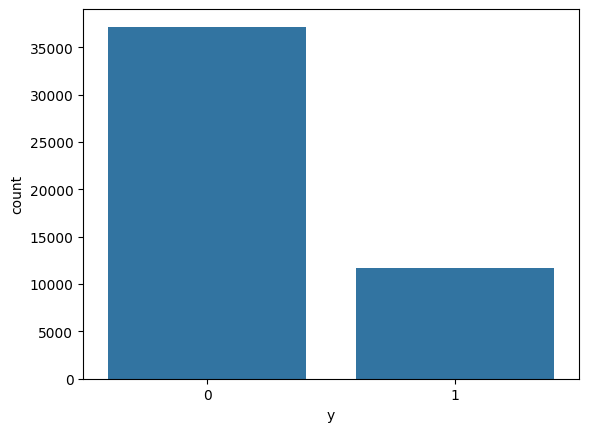

The percentage of people didn't make over 50k is 76.07%
The percentage of people make over 50k is 23.93%


In [7]:
# See the distribution of the data
# Most of the people don't make over 50k a year
sns.countplot(data = df, x = 'y')
plt.show()

# We can also see the percentile
print(f"The percentage of people didn't make over 50k is {round(100*(df['y'].value_counts()[0]/len(df)),2)}%")
print(f"The percentage of people make over 50k is {round(100*(df['y'].value_counts()[1]/len(df)),2)}%")


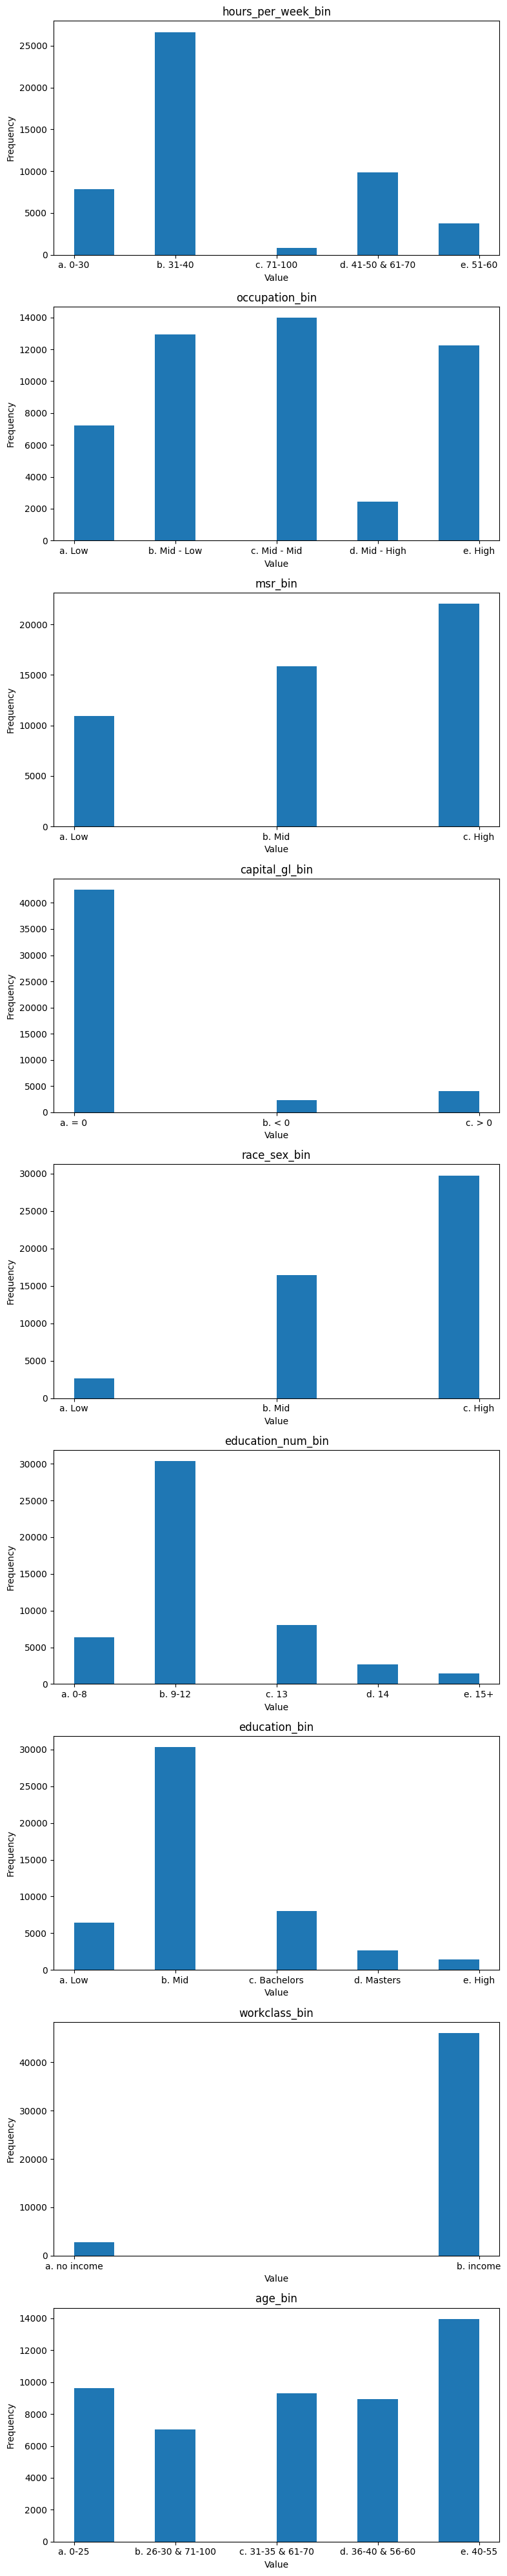

In [8]:
# Based on the graph, we see there is no outlier in this data, since it has been bin together
fig, axs = plt.subplots(len(category_column.columns), figsize=(8, 40))

for i, column in enumerate(category_column.columns):
    axs[i].hist(df[column].sort_values(), align='mid')
    axs[i].set_title(f"{column}")
    axs[i].set_xlabel("Value")
    axs[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

### Encoding data

In [9]:
# import the package for changeing categorical data to numerical data
# Since the categorical data's order has meaning in this dataframe, we will use label encoding
from sklearn.preprocessing import LabelEncoder

In [10]:
# We perform the labelencoder and save how we translate these model for future purpose
label_encoder = LabelEncoder()
encoded_labels = {}
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])
        encoded_labels[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Encoded Labels:")
print(encoded_labels)

Encoded Labels:
{'hours_per_week_bin': {'a. 0-30': 0, 'b. 31-40': 1, 'c. 71-100': 2, 'd. 41-50 & 61-70': 3, 'e. 51-60': 4}, 'occupation_bin': {'a. Low': 0, 'b. Mid - Low': 1, 'c. Mid - Mid': 2, 'd. Mid - High': 3, 'e. High': 4}, 'msr_bin': {'a. Low': 0, 'b. Mid': 1, 'c. High': 2}, 'capital_gl_bin': {'a. = 0': 0, 'b. < 0': 1, 'c. > 0': 2}, 'race_sex_bin': {'a. Low': 0, 'b. Mid': 1, 'c. High': 2}, 'education_num_bin': {'a. 0-8': 0, 'b. 9-12': 1, 'c. 13': 2, 'd. 14': 3, 'e. 15+': 4}, 'education_bin': {'a. Low': 0, 'b. Mid': 1, 'c. Bachelors': 2, 'd. Masters': 3, 'e. High': 4}, 'workclass_bin': {'a. no income': 0, 'b. income': 1}, 'age_bin': {'a. 0-25': 0, 'b. 26-30 & 71-100': 1, 'c. 31-35 & 61-70': 2, 'd. 36-40 & 56-60': 3, 'e. 40-55': 4}}


In [11]:
# Check the transformed dataframe
df

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,y
0,1,1,1,2,2,2,2,1,3,0
1,0,4,2,0,2,2,2,1,4,0
2,1,0,1,0,2,1,1,1,3,0
3,1,0,2,0,1,0,0,1,4,0
4,1,4,2,0,0,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...
48837,1,4,1,0,1,2,2,1,3,0
48838,1,1,0,0,1,1,1,0,2,0
48839,3,4,2,0,2,2,2,1,3,0
48840,1,1,0,2,2,2,2,1,4,0


### Apply analysis

In [12]:
# import the package for machine learning and tree visualization
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
# Check the columns
df.columns

Index(['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin', 'y'],
      dtype='object')

In [14]:
# Find seperate the feature and the target
X = df[['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin']]
y = df['y']

In [15]:
# Split the train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, stratify= y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36631, 9), (12211, 9), (36631,), (12211,))

In [16]:
# Train the most basic model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8369502907214806

In [17]:
# See the model performance
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      9289
           1       0.70      0.56      0.62      2922

    accuracy                           0.84     12211
   macro avg       0.78      0.74      0.76     12211
weighted avg       0.83      0.84      0.83     12211

[[8584  705]
 [1286 1636]]


In [18]:
# Trying to find the value that can be extract from the classification report
repo = classification_report(y_test, y_pred)
report_lines = repo.strip().split('\n')
weighted_avg_line = [line for line in report_lines if 'weighted avg' in line]
weighted_avg_values = weighted_avg_line[0].strip().split()
weighted_avg_values

['weighted', 'avg', '0.83', '0.84', '0.83', '12211']

In [19]:
# Quickly take a look at the tree, we can see there are to many nodes and leaves
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_2 <= 1.50
|   |--- feature_3 <= 1.50
|   |   |--- feature_5 <= 2.50
|   |   |   |--- feature_0 <= 1.50
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_6 <= 1.50
|   |   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |   |   |   |--- feature_8 <= 3.50
|   |   |   |   |   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_8 >  3.50
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 1.50
|   |   |   |   |   |   |   |   |   |  

### Hyperparameter tuning

In [20]:
# Build a function to see all the future classification metric in the classfication report
def get_model_report(report):
    model_report ={}
    report_lines = report.strip().split('\n')
    weighted_avg_line = [line for line in report_lines if 'weighted avg' in line]

    if weighted_avg_line:
        weighted_avg_values = weighted_avg_line[0].strip().split()
        precision = float(weighted_avg_values[2])
        recall = float(weighted_avg_values[3])
        f1_score = float(weighted_avg_values[4])

        model_report['Precision'] = precision
        model_report['Recall'] = recall
        model_report['F1-score'] = f1_score
    else:
        print("Wrong report")

    return model_report

In [21]:
# We extract the precision, recall, and F1-score in this dataframe
get_model_report(classification_report(y_test, y_pred))

{'Precision': 0.83, 'Recall': 0.84, 'F1-score': 0.83}

In [22]:
# We search all the parameter with our preference and try to find the best model
# With the function we created, we can append all the result together and make a dataframe
methods = ["gini", "entropy"]
max_features = [1, 2, 3, 4, 5, 6, 7]
max_depths =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
min_leafs = [1, 2, 3, 4,5,6,7]
results = []

for method in methods:
    for max_feature in max_features:
        for max_dep in max_depths:
            for min_leaf in min_leafs:
                model = DecisionTreeClassifier(criterion=method, max_features=max_feature, max_depth=max_dep, min_samples_leaf=min_leaf, random_state=109)
                model.fit(X_train, y_train)

                # Make predictions
                y_pred = model.predict(X_test)

                acc = accuracy_score(y_test, y_pred)
                report = classification_report(y_test, y_pred, zero_division=1.0)
                report_df = get_model_report(report)

                result_entry = {
                    'Criterion': method,
                    'Max_feature': max_feature,
                    'Max_depth': max_dep,
                    'Min_leaf': min_leaf,
                    'Accuracy': acc,
                    **report_df  # Unpack the report dictionary
                }

                results.append(result_entry)

results_df = pd.DataFrame(results)


In [ ]:
# With all the models, we can see the model's performance by comparing their score in different Matrix
# Since the assignment are looking for Accuracy score, we make sure the accuracy is the most important value in our tree
results_df.sort_values(by=["Accuracy","F1-score","Precision", "Recall","Max_depth","Max_feature", "Min_leaf"], ascending= [False, False, False, False,True, True, True]).head(10)

,Criterion,Max_feature,Max_depth,Min_leaf,Accuracy,Precision,Recall,F1-score
339,gini,3,9,4,0.845549,0.84,0.85,0.84
1592,entropy,5,8,4,0.845303,0.84,0.85,0.84
1879,entropy,7,9,4,0.845140,0.84,0.85,0.84
759,gini,6,9,4,0.844976,0.84,0.84,0.84
890,gini,7,8,2,0.844894,0.84,0.84,0.84
891,gini,7,8,3,0.844894,0.84,0.84,0.84
1335,entropy,3,11,6,0.844894,0.84,0.84,0.84
1593,entropy,5,8,5,0.844812,0.84,0.84,0.84
892,gini,7,8,4,0.844730,0.84,0.84,0.84
617,gini,5,9,2,0.844730,0.84,0.84,0.84


In [ ]:
# We also want to see with high performance model, which tree has less depth but has high accuracy
results_df.query('`Accuracy`>= 0.84').sort_values(by=["Max_depth","Max_feature", "Min_leaf"], ascending= [True, True, True])

,Criterion,Max_feature,Max_depth,Min_leaf,Accuracy,Precision,Recall,F1-score
455,gini,4,6,1,0.841127,0.83,0.84,0.83
456,gini,4,6,2,0.841127,0.83,0.84,0.83
457,gini,4,6,3,0.841127,0.83,0.84,0.83
458,gini,4,6,4,0.841127,0.83,0.84,0.83
459,gini,4,6,5,0.841127,0.83,0.84,0.83
...,...,...,...,...,...,...,...,...
975,gini,7,20,3,0.840717,0.83,0.84,0.83
1955,entropy,7,20,3,0.840062,0.83,0.84,0.83
1958,entropy,7,20,6,0.842028,0.83,0.84,0.84
979,gini,7,20,7,0.841127,0.83,0.84,0.83


Based on the grid search, we conclude the best tree is use gini index with 3

1.   List item
2.   List item

max feature, max depth is 9, and min_leaf is 4.
If we also consider the computation resource, the  entropy with 4 max feature, max depth is 5, and min_leaf is 1 is a great model too.

### Visualization

In [ ]:
# We can visulaize our final model
best_model_1 = DecisionTreeClassifier(criterion='entropy', max_features=4, max_depth=5, min_samples_leaf=1, random_state=109)
best_model_1.fit(X_train, y_train)
pred = best_model_1.predict(X_test)
accuracy_score(y_test, pred)


0.838833838342478

In [ ]:
# Check the model's performance
get_model_report(classification_report(y_test, pred))

{'Precision': 0.83, 'Recall': 0.84, 'F1-score': 0.84}

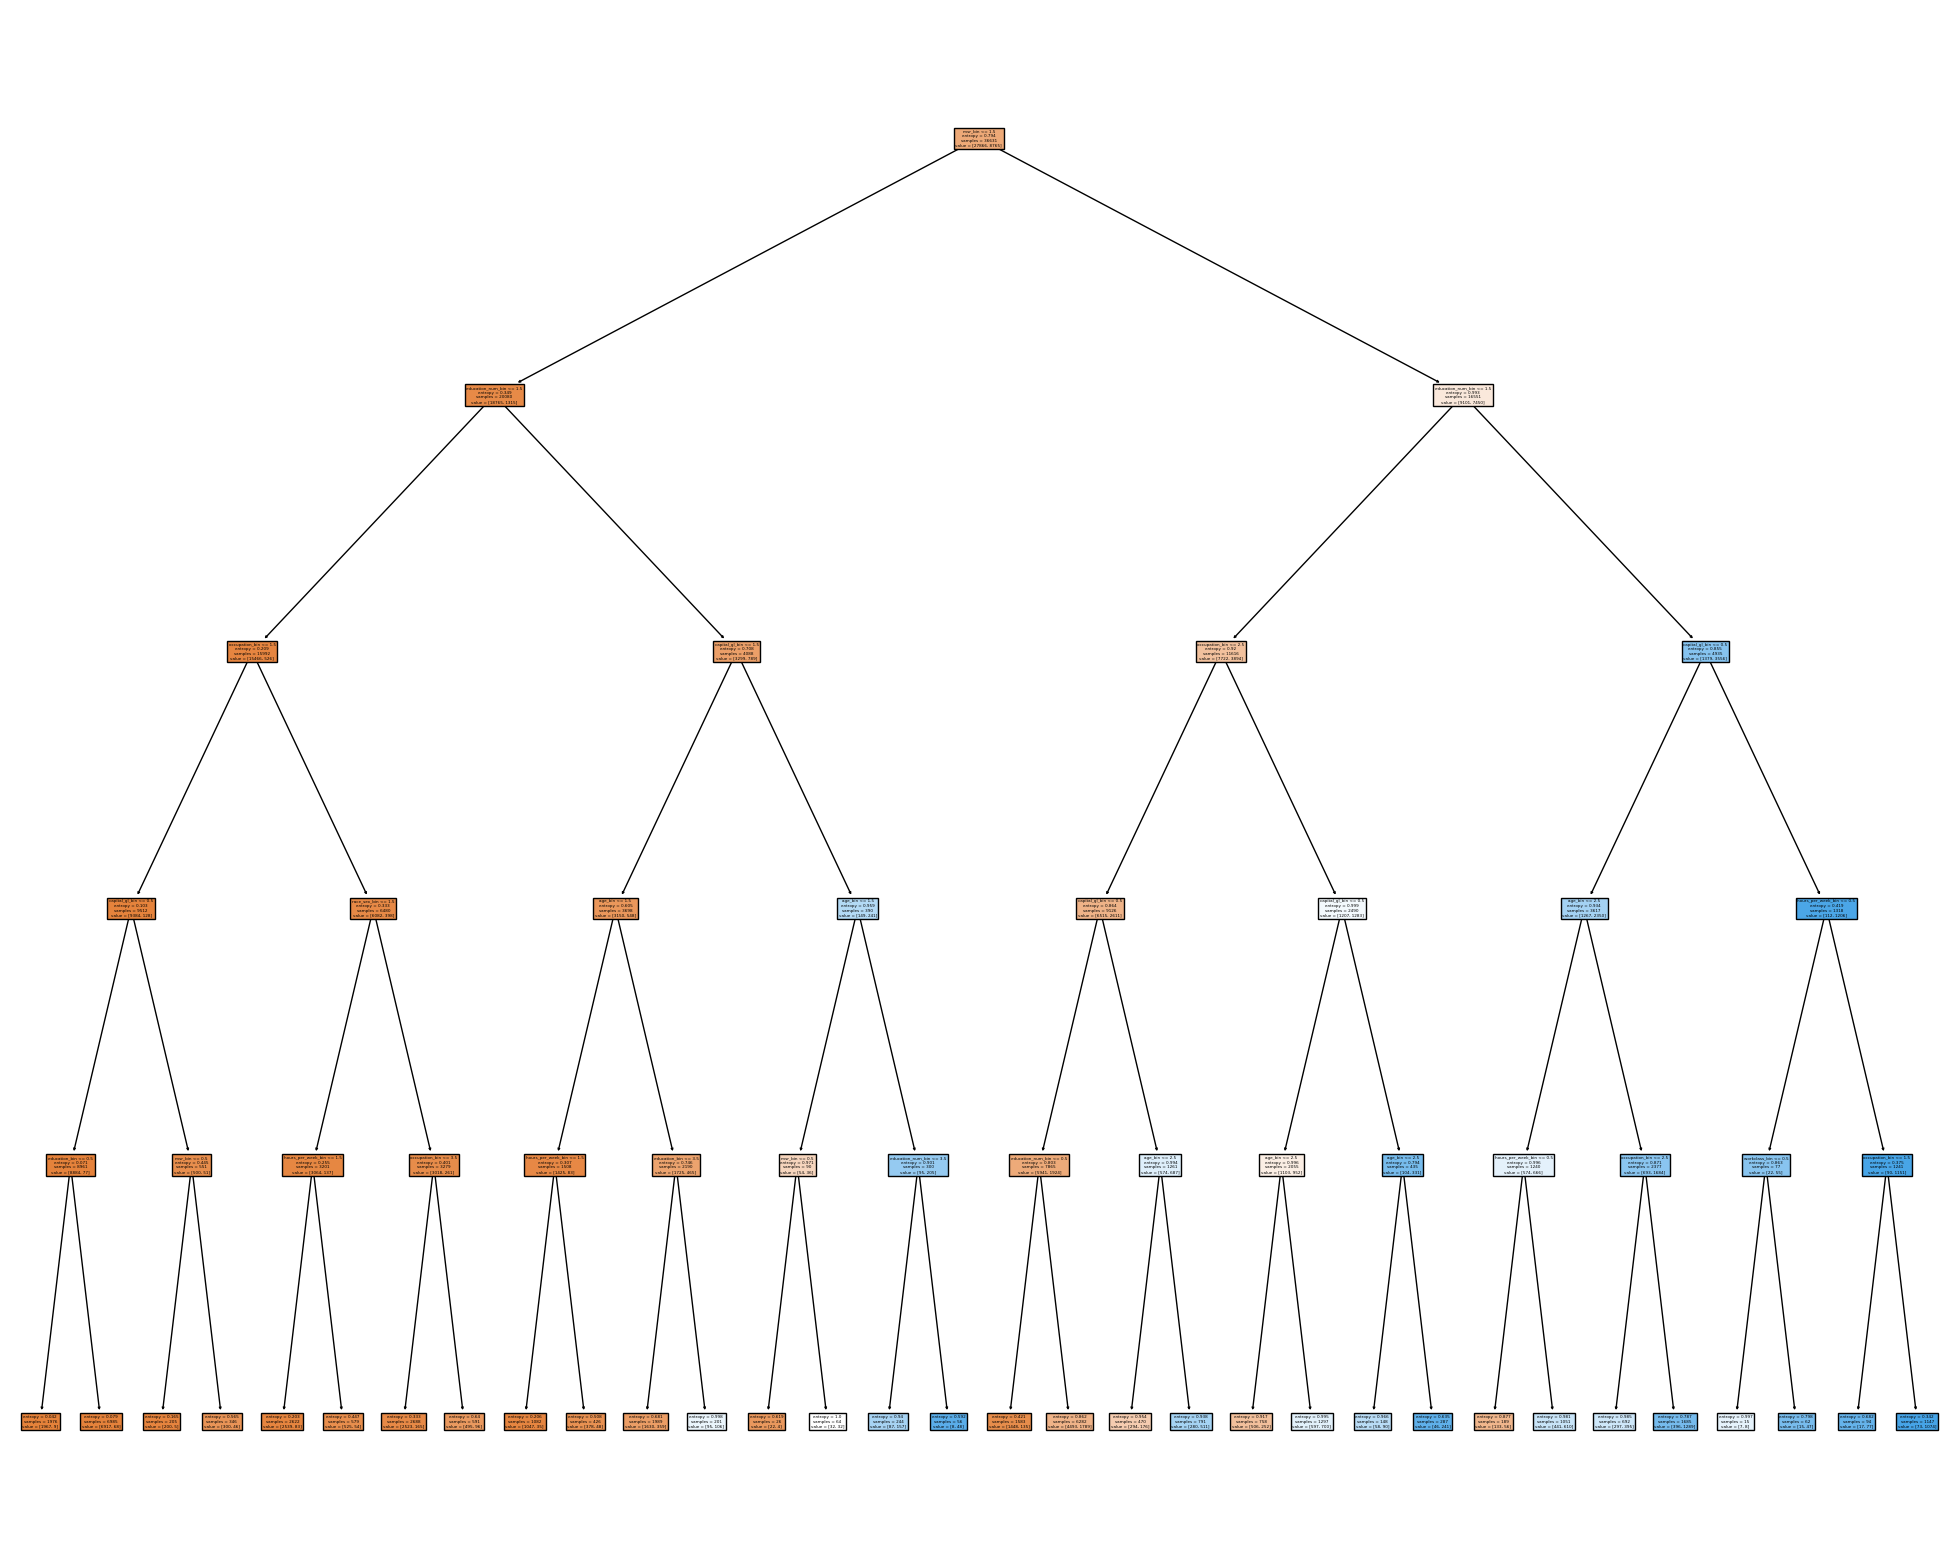

In [ ]:
# Visualize the model
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_model_1, feature_names=df.columns, filled=True);
plt.show()


### Testing
Base on our label coding, we have to see what input the person has and change it into the label we have

In [ ]:
# • Hours Worked per Week = 48
# • Occupation Category = Mid - Low
# • Marriage Status & Relationships = High
# • Capital Gain = Yes
# • Race-Sex Group = Mid
# • Number of Years of Education = 12
# • Education Category = High
# • Work Class = Income
# • Age = 58

# Check the label again
encoded_labels

{'hours_per_week_bin': {'a. 0-30': 0,
  'b. 31-40': 1,
  'c. 71-100': 2,
  'd. 41-50 & 61-70': 3,
  'e. 51-60': 4},
 'occupation_bin': {'a. Low': 0,
  'b. Mid - Low': 1,
  'c. Mid - Mid': 2,
  'd. Mid - High': 3,
  'e. High': 4},
 'msr_bin': {'a. Low': 0, 'b. Mid': 1, 'c. High': 2},
 'capital_gl_bin': {'a. = 0': 0, 'b. < 0': 1, 'c. > 0': 2},
 'race_sex_bin': {'a. Low': 0, 'b. Mid': 1, 'c. High': 2},
 'education_num_bin': {'a. 0-8': 0,
  'b. 9-12': 1,
  'c. 13': 2,
  'd. 14': 3,
  'e. 15+': 4},
 'education_bin': {'a. Low': 0,
  'b. Mid': 1,
  'c. Bachelors': 2,
  'd. Masters': 3,
  'e. High': 4},
 'workclass_bin': {'a. no income': 0, 'b. income': 1},
 'age_bin': {'a. 0-25': 0,
  'b. 26-30 & 71-100': 1,
  'c. 31-35 & 61-70': 2,
  'd. 36-40 & 56-60': 3,
  'e. 40-55': 4}}

In [ ]:
# Choose the option with the correct input and put it in a dataframe
data = ["d. 41-50 & 61-70", "b. Mid - Low", "c. High", "c. > 0", "b. Mid", "b. 9-12", "e. High", "b. income", "d. 36-40 & 56-60"]
columns = ['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin', 'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin', 'age_bin']
test_df = pd.DataFrame(data=[data], columns=columns)


In [ ]:
# Dictionary mapping labels to values
label_to_value_dict = {
    'hours_per_week_bin': {'a. 0-30': 0, 'b. 31-40': 1, 'c. 71-100': 2, 'd. 41-50 & 61-70': 3, 'e. 51-60': 4},
    'occupation_bin': {'a. Low': 0, 'b. Mid - Low': 1, 'c. Mid - Mid': 2, 'd. Mid - High': 3, 'e. High': 4},
    'msr_bin': {'a. Low': 0, 'b. Mid': 1, 'c. High': 2},
    'capital_gl_bin': {'a. = 0': 0, 'b. < 0': 1, 'c. > 0': 2},
    'race_sex_bin': {'a. Low': 0, 'b. Mid': 1, 'c. High': 2},
    'education_num_bin': {'a. 0-8': 0, 'b. 9-12': 1, 'c. 13': 2, 'd. 14': 3, 'e. 15+': 4},
    'education_bin': {'a. Low': 0, 'b. Mid': 1, 'c. Bachelors': 2, 'd. Masters': 3, 'e. High': 4},
    'workclass_bin': {'a. no income': 0, 'b. income': 1},
    'age_bin': {'a. 0-25': 0, 'b. 26-30 & 71-100': 1, 'c. 31-35 & 61-70': 2, 'd. 36-40 & 56-60': 3, 'e. 40-55': 4}
}

# Function to map labels to values
def map_labels_to_values(category, label):
    return label_to_value_dict[category][label]

# Apply the function to each column in the DataFrame
for column in test_df.columns:
    test_df[column] = test_df[column].apply(lambda x: map_labels_to_values(column, x))

test_df


,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin
0,3,1,2,2,1,1,4,1,3


In [ ]:
# After we get the new data, we use the model to predict the new data
best_model_1.predict(test_df)

array([1])

In [ ]:
# We can see the probability of two different outcome with this code
best_model_1.predict_proba(test_df)

array([[0.3539823, 0.6460177]])

In [ ]:
'''
Q.1 Discretizing continuous data into discrete categories, or binning, offers several advantages. It simplifies data representation, enhances model performance
by mitigating the influence of outliers and capturing non-linear relationships, facilitates feature engineering, and improves interpretability and stability of models. This approach allows
for easier identification of patterns and trends within the data, making complex information more accessible and actionable. However, it's crucial to
apply discretization carefully to avoid information loss or introducing biases.

Q.2 Not discretizing continuous data can lead to issues such as increased complexity in model interpretation, challenges in handling non-linear
relationships, greater sensitivity to outliers, difficulties in managing missing values, and potential loss in model performance due to inability
to capture patterns in large value ranges. Continuous variables might also make it harder for certain algorithms to converge or to identify complex
patterns effectively. However, can sometimes result in information loss, reduced accuracy, or oversimplification of data.

Q.3 It took 1m 45s to run best trained model

Q.5 Finding the Best Tree: Yes, the best tree was identified. The grid search for hyperparameters highlighted that the model using the gini index
with 3 max features, a max depth of 9, and a min_leaf of 4 performed exceptionally well. An alternative model with the entropy criterion also
showed promising results.

Q.6 Observations from Tree Visualization: The visualization of the best tree provided insights into the decision-making process of the model.
The tree's structure indicated the most influential features in predicting income levels. The tree was not overly complex, suggesting a good
balance between fitting the training data and generalizing to new data.

Q.7 Potential for Overfitting: The best tree appears to have a moderated risk of overfitting. Its complexity, indicated by the depth and the number
of leaves, was sufficient to capture the patterns in the data without being excessively detailed. Therefore, it is likely to generalize well to new data.
Prediction using the Trained Decision Tree Model

Q.8	•	The probability that this person earns '<=50K' is approximately 35.40%. The probability that this person earns '>50K' is approximately 64.60%.
These probabilities indicate the model's confidence in its prediction for each class. In this case, the model is more confident (about 64.60%) that this
individual's income category is '>50K' than '<=50K'. Therefore, if you were to make a prediction based on the highest probability, you would predict that
this person's income category is '>50K'. The probability that this prediction is correct, according to the model, is approximately 64.60%.
'''